In [2]:
import pandas as pd
# read the veteran dataset
df = pd.read_csv('D1.csv')
# show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51766 non-null object
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
dia

In [32]:
# change change into binary 0/1 variable
change_map = {'change':0, 'no change': 1}
df['change'] = df['change'].map(change_map)

In [33]:
# change diabetesMed into binary 0/1 variable
diabetesMed_map = {'yes':0, 'no': 1}
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51766 non-null object
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
dia

In [3]:
import numpy as np
df2 = df.select_dtypes(include=[np.number]) 

In [4]:
df2.mean()

encounter_id                2.445955e+08
patient_nbr                 7.181953e+07
admission_type_id           1.820287e+00
discharge_disposition_id    3.166905e+00
admission_source_id         5.201271e+00
time_in_hospital            4.237337e+00
num_lab_procedures          4.385320e+01
num_procedures              1.308214e+00
num_medications             1.673585e+01
number_outpatient           5.128463e-01
number_emergency            2.691728e-01
number_inpatient            6.868794e-01
number_diagnoses            7.928486e+00
dtype: float64

In [5]:
df2.median()

encounter_id                228334512.0
patient_nbr                  70375977.0
admission_type_id                   1.0
discharge_disposition_id            1.0
admission_source_id                 7.0
time_in_hospital                    3.0
num_lab_procedures                 45.0
num_procedures                      1.0
num_medications                    16.0
number_outpatient                   0.0
number_emergency                    0.0
number_inpatient                    0.0
number_diagnoses                    9.0
dtype: float64

In [6]:
df2.mode()[0:1]

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,150645834,88785891.0,1.0,1.0,7.0,3.0,1.0,0.0,15.0,0.0,0.0,0.0,9.0


In [7]:
# get the average time in hospital of a female patient who was readmitted in less than 30 days
print(df.groupby(['gender','readmitted'])['time_in_hospital'].mean())

gender           readmitted
Female           <30           4.524752
                 >30           4.465249
                 NO            4.207442
Male             <30           4.482972
                 >30           4.192097
                 NO            4.012216
Unknown/Invalid  >30           5.000000
                 NO            6.333333
Name: time_in_hospital, dtype: float64


In [11]:
# Which age group has the highest risk of being readmitted within 30 days?
print(df.groupby(['age'])['readmitted'].value_counts())

age       readmitted
?         NO               7
          >30              3
[0-10)    NO              17
          >30              6
[10-20)   NO             132
          >30             76
          <30             15
[20-30)   NO             464
          >30            230
          <30            121
[30-40)   NO            1008
          >30            522
          <30            187
[40-50)   NO            2611
          >30           1537
          <30            471
[50-60)   NO            4789
          >30           2905
          <30            788
[60-70)   NO            6270
          >30           4074
          <30           1274
[70-80)   NO            6770
          >30           4767
          <30           1435
[80-90)   NO            4930
          >30           3611
          <30           1130
[90-100)  NO             940
          >30            483
          <30            193
Name: readmitted, dtype: int64


In [12]:
# How many age groups have more than 3000 cases of being readmitted
print(df.groupby(['readmitted'])['age'].value_counts())

readmitted  age     
<30         [70-80)     1435
            [60-70)     1274
            [80-90)     1130
            [50-60)      788
            [40-50)      471
            [90-100)     193
            [30-40)      187
            [20-30)      121
            [10-20)       15
>30         [70-80)     4767
            [60-70)     4074
            [80-90)     3611
            [50-60)     2905
            [40-50)     1537
            [30-40)      522
            [90-100)     483
            [20-30)      230
            [10-20)       76
            [0-10)         6
            ?              3
NO          [70-80)     6770
            [60-70)     6270
            [80-90)     4930
            [50-60)     4789
            [40-50)     2611
            [30-40)     1008
            [90-100)     940
            [20-30)      464
            [10-20)      132
            [0-10)        17
            ?              7
Name: age, dtype: int64


In [13]:
# Which are the top-three race categories according to the number of readmission cases?
print(df.groupby(['race'])['readmitted'].value_counts())

race             readmitted
?                NO              649
                 >30             294
                 <30              73
AfricanAmerican  NO             4540
                 >30            2715
                 <30             815
Asian            NO              258
                 >30              82
                 <30              38
Caucasian        NO            21268
                 >30           14616
                 <30            4504
Hispanic         NO              674
                 >30             247
                 <30              97
Other            NO              549
                 >30             260
                 <30              87
Name: readmitted, dtype: int64


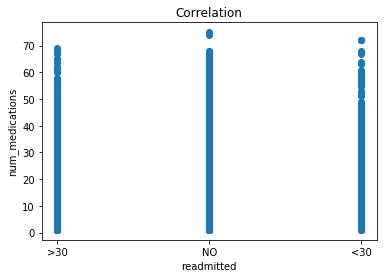

In [16]:
import matplotlib.pyplot as plt2
plt2.scatter(df['readmitted'], df['num_medications'])
plt2.title('Correlation')
plt2.xlabel('readmitted')
plt2.ylabel('num_medications')
plt2.show()

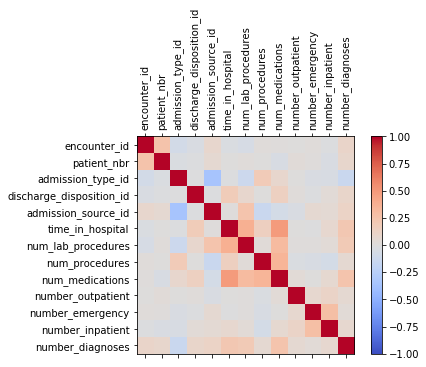

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()